   #                                  Machine Learning Foundation 
        Name:Md Arifur Rahman Anik 
        Roll:04
        Registration:11800320
        Dataset:Breast_cancer 

In [1]:
# READING THE DATASET 
import pandas as pd
dataset=pd.read_csv('breast-cancer.csv',na_values='?',header=None, skipinitialspace=True)
dataset

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [4]:
#IMPORTING MATPLOTLIB AND SEABORN TO SHOW THE GRAPHICAL MODEL OD DATASET 
import matplotlib.pyplot as plt 
import seaborn as sns 

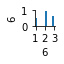

In [5]:
sns.pairplot(dataset,height=1)
plt.tight_layout()
plt.show()

In [4]:
#CHECKING THE NULL VALUES 
dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    8
6    0
7    0
8    1
9    0
dtype: int64

In [5]:
# APPLYING IMPUTER 
from sklearn.impute import SimpleImputer
im=SimpleImputer(strategy='most_frequent')
dataset=im.fit_transform(dataset)

In [6]:
#CHECKING THE NULL VALUES AGAIN 
pd.DataFrame(dataset).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [7]:
#APPYLING LABEL ENCODER TO DEAL WITH CATEGORICAL DATA 

columns=[0,1,2,3,4,5,7,8,9]

In [8]:
dataset=pd.DataFrame(dataset)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
    dataset[i]=le.fit_transform(dataset[i])

In [9]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0


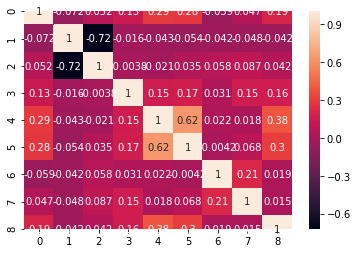

In [10]:
#THIS GRAPHICAL VIEW IS FOR CORELATIONAL COFFICIENT OF DATASET 
import numpy as np
cm=np.corrcoef(dataset[columns].values.T)
hm=sns.heatmap(cm,annot=True)

In [11]:
#SETTING TARGET COLUMN AND DROPING 
target=dataset[0]
data=dataset.drop(columns=[0])

In [12]:
data.shape

(286, 9)

In [13]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(data)
pd.DataFrame(data_sc).describe()

,0,1,2,3,4,5,6,7,8
count,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02,2.860000e+02
mean,1.015117e-16,1.350901e-16,-3.412189e-16,-1.742196e-15,-5.054232e-16,8.974950e-16,-2.197155e-16,-4.968830e-17,-7.134930e-16
std,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00,1.001753e+00
min,-2.637831e+00,-1.089825e+00,-1.892006e+00,-5.556227e-01,-4.934352e-01,-1.423416e+00,-9.389244e-01,-1.639234e+00,-5.585039e-01
25%,-6.577269e-01,-1.089825e+00,-4.949827e-01,-5.556227e-01,-4.934352e-01,-6.642610e-02,-9.389244e-01,-7.181713e-01,-5.585039e-01
50%,3.323252e-01,9.407283e-01,-2.930819e-02,-5.556227e-01,-4.934352e-01,-6.642610e-02,-9.389244e-01,2.028914e-01,-5.585039e-01
75%,3.323252e-01,9.407283e-01,4.363664e-01,-3.800676e-02,-4.934352e-01,1.290564e+00,1.065049e+00,2.028914e-01,-5.585039e-01
max,2.312429e+00,9.407283e-01,2.764739e+00,2.550073e+00,2.026609e+00,1.290564e+00,1.065049e+00,2.045017e+00,1.790498e+00


In [14]:
# APPLYING SPLITING METHOD IN TRAIN TEST DATA 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data, target, test_size=0.25)

In [15]:
x_test.shape

(72, 9)

# PERCEPTRON 

In [19]:
from sklearn.linear_model import Perceptron 

from sklearn.metrics import accuracy_score

p=Perceptron()

p.fit(x_train, y_train)
print("accuracy score",accuracy_score(p.predict(x_train), y_train))
print("accuracy score",accuracy_score(p.predict(x_test), y_test))

accuracy score 0.7009345794392523
accuracy score 0.7638888888888888


# SVM

In [21]:
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()

lr.fit(x_train, y_train)


print("accuracy score",accuracy_score(lr.predict(x_train), y_train))
print("accuracy score",accuracy_score(lr.predict(x_test), y_test))

accuracy score 0.7289719626168224
accuracy score 0.8055555555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [23]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
pred_train_knn=knn.predict(x_train)
pred_test_knn=knn.predict(x_test)

In [25]:
print("accuracy score",accuracy_score(pred_train_knn, y_train))
print("accuracy score",accuracy_score(pred_test_knn, y_test))

accuracy score 0.7710280373831776
accuracy score 0.75


# Logistic Regression 

In [26]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train, y_train)

print("accuracy score",accuracy_score(lr.predict(x_train), y_train))
print("accuracy score",accuracy_score(lr.predict(x_test), y_test))

accuracy score 0.7289719626168224
accuracy score 0.8055555555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest Classifier 

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10)

rfc.fit(x_train, y_train)

print("accuracy score",accuracy_score(rfc.predict(x_train), y_train))
print("accuracy score",accuracy_score(rfc.predict(x_test), y_test))

accuracy score 0.9485981308411215
accuracy score 0.7777777777777778


# Bagging Classifier 

In [28]:
from sklearn.ensemble import BaggingClassifier

bag=BaggingClassifier(base_estimator=lr, n_estimators=5)

bag.fit(x_train, y_train)

print("accuracy score",accuracy_score(bag.predict(x_train), y_train))
print("accuracy score",accuracy_score(bag.predict(x_test), y_test))

accuracy score 0.7429906542056075
accuracy score 0.7916666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# Ada boost classifier 

In [29]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()

ada.fit(x_train, y_train)

print("accuracy score",accuracy_score(ada.predict(x_train), y_train))
print("accuracy score",accuracy_score(ada.predict(x_test), y_test))

accuracy score 0.7616822429906542
accuracy score 0.7638888888888888


# PCA

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)

In [31]:
data_pca=pca.fit_transform(data_sc)

In [32]:
data_pca.shape

(286, 5)

In [33]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1=train_test_split(data_pca, target, test_size=0.25)

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train1,y_train1)

from sklearn.metrics import accuracy_score
pred_train1=lr.predict(x_train1)
pred_test1=lr.predict(x_test1)

print("Training accuracy score",accuracy_score(pred_train1,y_train1))
print("testing accuracy score",accuracy_score(pred_test1,y_test1))

Training accuracy score 0.7242990654205608
testing accuracy score 0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# LDA

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
data_lda=lda.fit_transform(data_sc,target)

In [37]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2=train_test_split(data_lda, target, test_size=0.25)

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train2,y_train2)

from sklearn.metrics import accuracy_score
pred_train2=lr.predict(x_train2)
pred_test2=lr.predict(x_test2)

print("Training accuracy score",accuracy_score(pred_train2,y_train2))
print("testing accuracy score",accuracy_score(pred_test2,y_test2))

Training accuracy score 0.7570093457943925
testing accuracy score 0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# KPCA

In [39]:
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=12, kernel='sigmoid')

In [40]:
data_kpca=kpca.fit_transform(data_sc)

In [41]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3=train_test_split(data_kpca, target, test_size=0.25)

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train3,y_train3)
from sklearn.metrics import accuracy_score
pred_train3=lr.predict(x_train3)
pred_test3=lr.predict(x_test3)
print("accuracy score",accuracy_score(pred_train3,y_train3))
print("accuracy score",accuracy_score(pred_test3,y_test3))

accuracy score 0.7850467289719626
accuracy score 0.6805555555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


  #                                                     THANK YOU 